<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
x = np.linspace(-4,4,25)
y = np.linspace(-4,4,25)
X,Y = np.meshgrid(x,y)

def potencial_de_flujo(x,y):
    r = x**2 + y**2
    distancia = np.where(r == 0, 1e-10, r)
    potencial = np.where((r > 2**2),np.multiply( 2 * X ,(1 - ((2**2) / r))), 0)
    return potencial

In [33]:
print(potencial_de_flujo(X,Y))

[[-7.         -6.33710692 -5.68306011 -5.04       -4.41025641 -3.79620035
  -3.2        -2.62327416 -2.06666667 -1.52941176 -1.00900901 -0.50114943
   0.          0.50114943  1.00900901  1.52941176  2.06666667  2.62327416
   3.2         3.79620035  4.41025641  5.04        5.68306011  6.33710692
   7.        ]
 [-6.91320755 -6.24242424 -5.58069382 -4.93069307 -4.2954955  -3.67843137
  -3.08280255 -2.51141553 -1.96593674 -1.44615385 -0.94933333 -0.46994536
   0.          0.46994536  0.94933333  1.44615385  1.96593674  2.51141553
   3.08280255  3.67843137  4.2954955   4.93069307  5.58069382  6.24242424
   6.91320755]
 [-6.81967213 -6.1387632  -5.46666667 -4.80662983 -4.16260163 -3.53914989
  -2.94117647 -2.37333333 -1.83908046 -1.33944954 -0.87179487 -0.4290429
   0.          0.4290429   0.87179487  1.33944954  1.83908046  2.37333333
   2.94117647  3.53914989  4.16260163  4.80662983  5.46666667  6.1387632
   6.81967213]
 [-6.72       -6.02640264 -5.34069982 -4.66666667 -4.0091954  -3.3743

<ipython-input-32-d10aafa13307>:9: RuntimeWarning: divide by zero encountered in divide
  potencial = np.where((r > 2**2),np.multiply( 2 * X ,(1 - ((2**2) / r))), 0)
<ipython-input-32-d10aafa13307>:9: RuntimeWarning: invalid value encountered in multiply
  potencial = np.where((r > 2**2),np.multiply( 2 * X ,(1 - ((2**2) / r))), 0)


In [31]:
import numpy as np

def velocidades(x,y,h = 0.001):

  potencial = potencial_de_flujo(x,y)
  R = 2
  X,Y = np.meshgrid(x,y)
  Vx = np.zeros_like(25)
  Vy = np.zeros_like(25)


  for i in range(25):
    for j in range(25):
        if (X[i][j]**2 + Y[i][j]**2 <= R**2):
            Vx[i][j] = 0
            Vy[i][j] = 0

        else:
            Vx[i][j] = (potencial_de_flujo(X[i][j] + h,Y[i][j]) - potencial_de_flujo(X[i][j]-h,Y[i][j])) / (2 * h)
            Vy[i][j] = -((potencial_de_flujo(X[i][j], Y[i][j]+h) - potencial_de_flujo(X[i][j],Y[i][j]-h)) / (2 * h))



  return Vx, Vy

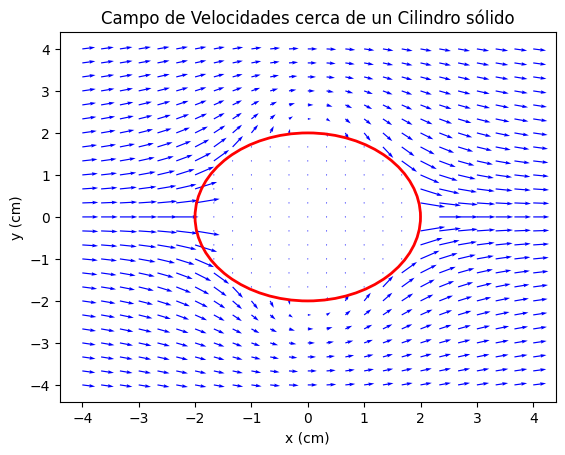

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.quiver(x,y,Vx,Vy,color='blue')
circulo = plt.Circle((0, 0), 2, color='red', fill=False, linewidth=2)
ax.add_patch(circulo)
plt.title('Campo de Velocidades cerca de un Cilindro sólido')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()